# Data Pre-processing
### Import library

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
riders = pd.read_csv("data/Riders.csv")
riders.head()
# Age is the numbers of days since the rider delivered the first order

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [3]:
riders.shape

(960, 5)

In [4]:
riders.describe()

,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,960.000000,960.000000,960.000000,960.000000
mean,1864.851042,1200.234375,13.412604,427.983333
std,1880.337785,810.930171,2.675794,486.957931
min,2.000000,96.000000,0.000000,0.000000
25%,261.750000,478.250000,13.500000,30.000000
50%,1475.500000,1021.000000,14.000000,223.000000
75%,2847.250000,1891.500000,14.300000,678.750000
max,9756.000000,3764.000000,15.200000,2298.000000


In [5]:
riders.columns

Index(['Rider Id', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'], dtype='object')

In [6]:
# Rename the column so that it is compatible with pandas's dot notation
riders = riders.rename(columns = {"Rider Id": "Rider_Id"})
riders.head()

,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [7]:
train = pd.read_csv("data/train.csv")
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [8]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

### *Change the columns name so that it is compatible with pandas*

In [9]:
columns = train.columns
new_columns = columns.str.replace("-", "")
new_columns = new_columns.str.replace("Mo = 1", "")
new_columns = new_columns.str.replace("()", "", regex = False)
new_columns = new_columns.str.replace(" ", "_")
train.columns = new_columns
train = train.rename(columns = {"Distance_(KM)": "Distance"})
train.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement__Day_of_Month',
       'Placement__Weekday_', 'Placement__Time', 'Confirmation__Day_of_Month',
       'Confirmation__Weekday_', 'Confirmation__Time',
       'Arrival_at_Pickup__Day_of_Month', 'Arrival_at_Pickup__Weekday_',
       'Arrival_at_Pickup__Time', 'Pickup__Day_of_Month', 'Pickup__Weekday_',
       'Pickup__Time', 'Arrival_at_Destination__Day_of_Month',
       'Arrival_at_Destination__Weekday_', 'Arrival_at_Destination__Time',
       'Distance', 'Temperature', 'Precipitation_in_millimeters', 'Pickup_Lat',
       'Pickup_Long', 'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival'],
      dtype='object')

In [10]:
train.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_,Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_,...,Arrival_at_Destination__Time,Distance,Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


# Drop unnecessary columns 
- Vehicle_Type: Only Bike in this dataset 
- Lat and Long: Do not think it is necessary in our dataset. Moreover I do not know how to use Spacial data

In [11]:
train.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement__Day_of_Month',
       'Placement__Weekday_', 'Placement__Time', 'Confirmation__Day_of_Month',
       'Confirmation__Weekday_', 'Confirmation__Time',
       'Arrival_at_Pickup__Day_of_Month', 'Arrival_at_Pickup__Weekday_',
       'Arrival_at_Pickup__Time', 'Pickup__Day_of_Month', 'Pickup__Weekday_',
       'Pickup__Time', 'Arrival_at_Destination__Day_of_Month',
       'Arrival_at_Destination__Weekday_', 'Arrival_at_Destination__Time',
       'Distance', 'Temperature', 'Precipitation_in_millimeters', 'Pickup_Lat',
       'Pickup_Long', 'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival'],
      dtype='object')

In [12]:
columns_to_drop = ["Vehicle_Type", "Pickup_Lat", "Pickup_Long", "Destination_Lat", "Destination_Long"]
train.drop(columns_to_drop, axis = 1, inplace = True)
train.head()

,Order_No,User_Id,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_,Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_,Confirmation__Time,...,Pickup__Weekday_,Pickup__Time,Arrival_at_Destination__Day_of_Month,Arrival_at_Destination__Weekday_,Arrival_at_Destination__Time,Distance,Temperature,Precipitation_in_millimeters,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,...,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,...,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,...,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,...,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,Rider_Id_770,1214


# **Merge** train data and riders data

In [13]:
df = pd.merge(train, riders, on = "Rider_Id")
df.shape

(21201, 28)

In [14]:
train.shape

(21201, 24)

### Shape looks good

In [15]:
df.head(10)

,Order_No,User_Id,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_,Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_,Confirmation__Time,...,Arrival_at_Destination__Time,Distance,Temperature,Precipitation_in_millimeters,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,10:39:55 AM,4,20.4,NaN,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,3,Personal,18,5,3:41:17 PM,18,5,3:41:30 PM,...,5:01:43 PM,20,24.5,NaN,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,3,Business,31,5,12:51:41 PM,31,5,1:12:49 PM,...,2:16:43 PM,6,24.7,NaN,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,3,Personal,2,2,7:12:10 AM,2,2,7:12:29 AM,...,8:28:32 AM,18,15.2,NaN,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,2,Personal,22,2,10:40:58 AM,22,2,10:42:24 AM,...,11:26:22 AM,7,19.2,NaN,Rider_Id_432,1602,1637,1309,13.8,549
5,Order_No_10440,User_Id_2801,3,Business,29,3,12:14:43 PM,29,3,12:15:51 PM,...,1:03:43 PM,26,NaN,NaN,Rider_Id_432,2313,1637,1309,13.8,549
6,Order_No_25321,User_Id_1882,1,Business,2,2,9:08:42 AM,2,2,9:08:57 AM,...,10:05:05 AM,8,15.2,NaN,Rider_Id_432,1638,1637,1309,13.8,549
7,Order_No_2476,User_Id_2260,1,Personal,19,5,4:12:56 PM,19,5,4:16:19 PM,...,5:10:58 PM,7,24.5,NaN,Rider_Id_432,1897,1637,1309,13.8,549
8,Order_No_14704,User_Id_2186,1,Personal,28,1,3:03:10 PM,28,1,3:04:38 PM,...,4:00:44 PM,11,24.3,NaN,Rider_Id_432,1698,1637,1309,13.8,549
9,Order_No_118,User_Id_3688,3,Business,14,4,2:42:58 PM,14,4,2:44:37 PM,...,4:13:52 PM,12,27.5,NaN,Rider_Id_432,2693,1637,1309,13.8,549


### <font color='#eb3483'> Duplicates </font>

In [16]:
df[df.duplicated()].shape

(0, 28)

#### No duplicates found!!! Great! 

### <font color='#eb3483'> Missing Values </font>

In [17]:
df.isna().sum()/df.shape[0] # proportion missing in each column

Order_No                                0.000000
User_Id                                 0.000000
Platform_Type                           0.000000
Personal_or_Business                    0.000000
Placement__Day_of_Month                 0.000000
Placement__Weekday_                     0.000000
Placement__Time                         0.000000
Confirmation__Day_of_Month              0.000000
Confirmation__Weekday_                  0.000000
Confirmation__Time                      0.000000
Arrival_at_Pickup__Day_of_Month         0.000000
Arrival_at_Pickup__Weekday_             0.000000
Arrival_at_Pickup__Time                 0.000000
Pickup__Day_of_Month                    0.000000
Pickup__Weekday_                        0.000000
Pickup__Time                            0.000000
Arrival_at_Destination__Day_of_Month    0.000000
Arrival_at_Destination__Weekday_        0.000000
Arrival_at_Destination__Time            0.000000
Distance                                0.000000
Temperature         

#### We could see that precipitation is missing a lot 
- This Dataset only includes one that are carried by Bike. People might not use Bike when it is raining
- Since the data set significantly lacks Precipitation, do not use this variable
- Temperature is missing 20% of the data. Might be because they did not measured it

## Analysis 
Look for/take note of any correlations or explicit trends in the following variables (linear/non-linear relationship, outliers, or no correlation at all) <br> 
- *Total travel time of a given package VS. the total distance in km between the pickup point and the dropoff point*

- The average time a rider takes on any given package (you might have to search for a rider id among the orders dataset, then compare the times) VS. the average rating that same rider has

- The number of orders a given rider takes on in a given day (same scenario as above, might have to search for specific rider then compare times within the same day) VS. the total time taken between orders (looking for possible fatigue from consecutive orders that affects delivery times)

### Graph the total travel time and total distance using seaborn

In [18]:
df.head()

,Order_No,User_Id,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_,Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_,Confirmation__Time,...,Arrival_at_Destination__Time,Distance,Temperature,Precipitation_in_millimeters,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,10:39:55 AM,4,20.4,NaN,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,3,Personal,18,5,3:41:17 PM,18,5,3:41:30 PM,...,5:01:43 PM,20,24.5,NaN,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,3,Business,31,5,12:51:41 PM,31,5,1:12:49 PM,...,2:16:43 PM,6,24.7,NaN,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,3,Personal,2,2,7:12:10 AM,2,2,7:12:29 AM,...,8:28:32 AM,18,15.2,NaN,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,2,Personal,22,2,10:40:58 AM,22,2,10:42:24 AM,...,11:26:22 AM,7,19.2,NaN,Rider_Id_432,1602,1637,1309,13.8,549


### Distribution of distance

<AxesSubplot:xlabel='Distance', ylabel='Count'>

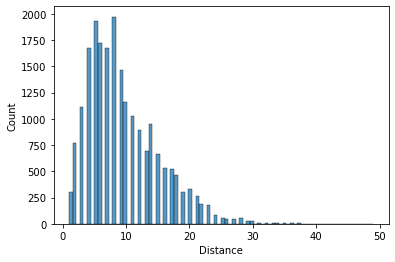

In [19]:
sns.histplot(data = df,  x = "Distance")

<AxesSubplot:xlabel='Distance', ylabel='Time_from_Pickup_to_Arrival'>

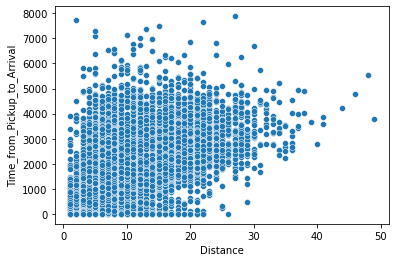

In [20]:
sns.scatterplot(data = df, y = "Time_from_Pickup_to_Arrival", x = "Distance")

<AxesSubplot:xlabel='Distance', ylabel='Time_from_Pickup_to_Arrival'>

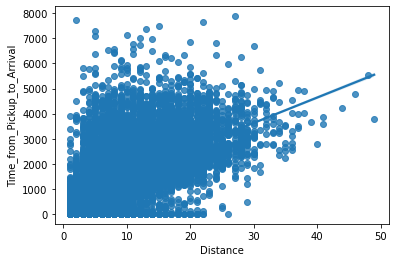

In [21]:
sns.regplot(data = df, y = "Time_from_Pickup_to_Arrival", x = "Distance")

### *We could draw a regression line but it is not that obvious. Also, the time varies a lot despite the distance being the same*

# Ideas
### Combination of the distance and something could affect the total time
### Look at distribution of each variables, boxplot of each variable
### Calculate average_speed => distance / time
### Do not forget to set seed
### Change to minutes. 
### look at each day and how many orders are placed

## Question
- ###  If the distance is similar why are there so much variation in Time from pickup to arrival. We can investigate that more
- ###  Might be because of the riders experience? => If so we can *groupby* riders

In [25]:
Avg_by_rider = df.groupby("Rider_Id")[["Distance", "Time_from_Pickup_to_Arrival", "Average_Rating", "No_Of_Orders", "Age", "Temperature"]].agg("mean")
Avg_by_rider

,Distance,Time_from_Pickup_to_Arrival,Average_Rating,No_Of_Orders,Age,Temperature
Rider_Id,,,,,,
Rider_Id_0,12.000000,1393.000000,14.0,3048.0,2570.0,26.400000
Rider_Id_1,11.000000,1333.000000,0.0,8.0,589.0,25.000000
Rider_Id_10,9.490196,529.098039,13.3,6978.0,1990.0,23.248780
Rider_Id_100,8.171717,1271.929293,13.4,362.0,910.0,21.940000
Rider_Id_101,10.491803,1755.579235,13.1,1299.0,986.0,21.976774
...,...,...,...,...,...,...
Rider_Id_959,8.956522,1556.086957,13.7,275.0,379.0,25.418182
Rider_Id_96,9.817308,1485.163462,14.8,713.0,726.0,23.615217
Rider_Id_97,10.571429,965.857143,13.5,5694.0,2419.0,22.880000


### From this data frame we can calculate how much time each rider take per km on average

In [26]:
time_per_km = Avg_by_rider.Time_from_Pickup_to_Arrival / Avg_by_rider.Distance
time_per_km
Avg_by_rider["Time_per_km"] = time_per_km
Avg_by_rider.head()

,Distance,Time_from_Pickup_to_Arrival,Average_Rating,No_Of_Orders,Age,Temperature,Time_per_km
Rider_Id,,,,,,,
Rider_Id_0,12.000000,1393.000000,14.0,3048.0,2570.0,26.400000,116.083333
Rider_Id_1,11.000000,1333.000000,0.0,8.0,589.0,25.000000,121.181818
Rider_Id_10,9.490196,529.098039,13.3,6978.0,1990.0,23.248780,55.752066
Rider_Id_100,8.171717,1271.929293,13.4,362.0,910.0,21.940000,155.650185
Rider_Id_101,10.491803,1755.579235,13.1,1299.0,986.0,21.976774,167.328646


<AxesSubplot:xlabel='Distance', ylabel='Time_from_Pickup_to_Arrival'>

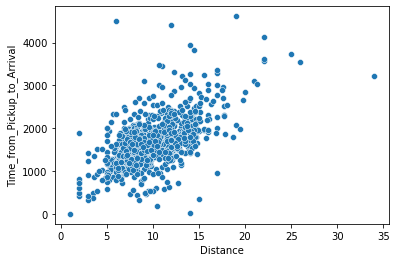

In [27]:
sns.scatterplot(data = Avg_by_rider,  x = "Distance", y = "Time_from_Pickup_to_Arrival")

<AxesSubplot:xlabel='Distance', ylabel='Time_from_Pickup_to_Arrival'>

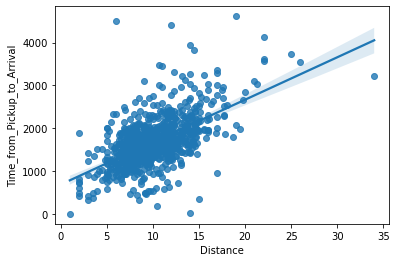

In [28]:
sns.regplot(data = Avg_by_rider,  x = "Distance", y = "Time_from_Pickup_to_Arrival")

<AxesSubplot:xlabel='Age', ylabel='Time_per_km'>

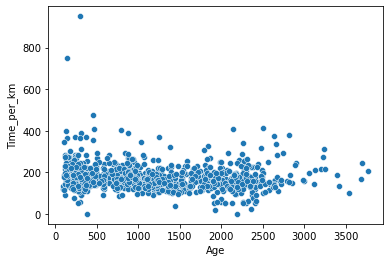

In [29]:
sns.scatterplot(data = Avg_by_rider, x = "Age", y = "Time_per_km") 

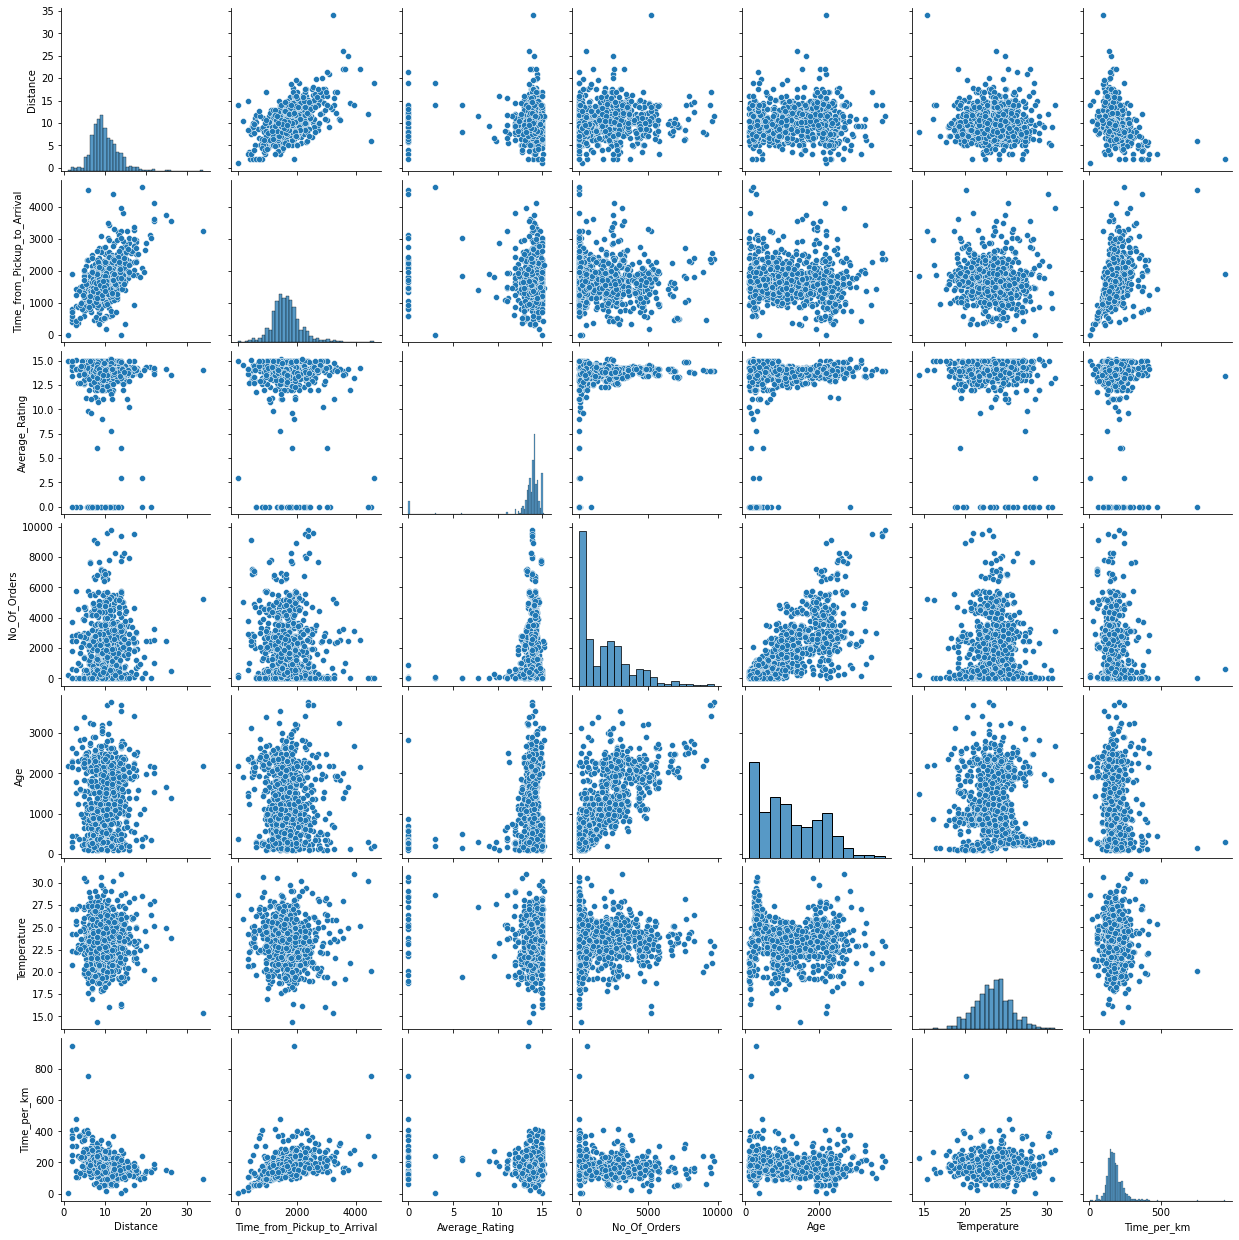

In [30]:
sns.pairplot(data = Avg_by_rider)

### The number of orders a given rider takes on in a given day (same scenario as above, might have to search for specific rider then compare times within the same day) VS. the total time taken between orders (looking for possible fatigue from consecutive orders that affects delivery times)

### I think it is impossible to investigate that on this dataset since they do now show the months

In [31]:
df.columns

Index(['Order_No', 'User_Id', 'Platform_Type', 'Personal_or_Business',
       'Placement__Day_of_Month', 'Placement__Weekday_', 'Placement__Time',
       'Confirmation__Day_of_Month', 'Confirmation__Weekday_',
       'Confirmation__Time', 'Arrival_at_Pickup__Day_of_Month',
       'Arrival_at_Pickup__Weekday_', 'Arrival_at_Pickup__Time',
       'Pickup__Day_of_Month', 'Pickup__Weekday_', 'Pickup__Time',
       'Arrival_at_Destination__Day_of_Month',
       'Arrival_at_Destination__Weekday_', 'Arrival_at_Destination__Time',
       'Distance', 'Temperature', 'Precipitation_in_millimeters', 'Rider_Id',
       'Time_from_Pickup_to_Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')

In [32]:
(df.Distance < 20).value_counts()

True     19832
False     1369
Name: Distance, dtype: int64

In [33]:
df_dislessthan20 = df[df.Distance < 20]
df_dislessthan20

,Order_No,User_Id,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_,Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_,Confirmation__Time,...,Arrival_at_Destination__Time,Distance,Temperature,Precipitation_in_millimeters,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,10:39:55 AM,4,20.4,NaN,Rider_Id_432,745,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,3,Business,31,5,12:51:41 PM,31,5,1:12:49 PM,...,2:16:43 PM,6,24.7,NaN,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,3,Personal,2,2,7:12:10 AM,2,2,7:12:29 AM,...,8:28:32 AM,18,15.2,NaN,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,2,Personal,22,2,10:40:58 AM,22,2,10:42:24 AM,...,11:26:22 AM,7,19.2,NaN,Rider_Id_432,1602,1637,1309,13.8,549
6,Order_No_25321,User_Id_1882,1,Business,2,2,9:08:42 AM,2,2,9:08:57 AM,...,10:05:05 AM,8,15.2,NaN,Rider_Id_432,1638,1637,1309,13.8,549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_27103,User_Id_3718,3,Business,13,2,11:09:37 AM,13,2,11:32:18 AM,...,12:08:07 PM,3,22.2,NaN,Rider_Id_528,919,5770,1793,14.2,2205
21197,Order_No_3786,User_Id_1558,3,Personal,21,4,4:33:17 PM,21,4,4:47:27 PM,...,5:49:44 PM,6,19.9,NaN,Rider_Id_638,2331,102,873,13.7,32
21198,Order_No_7281,User_Id_2008,3,Business,10,1,5:00:40 PM,10,1,5:11:21 PM,...,6:47:35 PM,7,19.0,NaN,Rider_Id_773,2418,5,105,0.0,0
21199,Order_No_15575,User_Id_1346,3,Business,29,2,2:31:55 PM,29,2,2:32:43 PM,...,3:00:20 PM,2,27.0,NaN,Rider_Id_860,717,5,448,15.0,2


<AxesSubplot:xlabel='No_Of_Orders', ylabel='Time_from_Pickup_to_Arrival'>

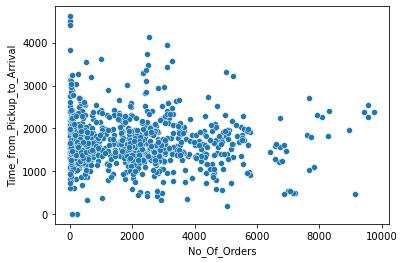

In [34]:
Avg_order_by_rider = df.groupby("Rider_Id")[["Time_from_Pickup_to_Arrival", "No_Of_Orders"]].agg("mean")
Avg_order_by_rider
sns.scatterplot(data = Avg_order_by_rider,  x = "No_Of_Orders", y = "Time_from_Pickup_to_Arrival")

### If you think of it this does not give any insight because distance is different
### Look at AM and PM: Time, Rush hour

In [ ]:
time = pd.to_datetime(df.Confirmation__Time)
time < 